# Diferencias Finitas

El método de diferencias finitas corresponde a una aproximación discreta del dominio del problema, generando un sistema de ecuaciones para tal efecto. Tanto Ecuaciones diferenciales ordinarias como parciales pueden ser resueltas numéricamente con este método.

Tomemos las fórmulas de diferencias finitas centradas para estimar la primera y segunda derivada de nuestra función a aproximar,

$$y'(t) = \frac{y(t+h)-y(t-h)}{2h} - \frac{h^2}{6}y'''(c)$$

$$y''(t) = \frac{y(t+h)-2y(t) + y(t-h)}{h^2} + \frac{h^2}{12}y''''(c)$$

y las reemplazaremos en nuestros problemas que involucran ecuaciones diferenciales. Si el problema original es lineal, el sistema de ecuaciones a resolver será lineal y podemos aproximarlo por eliminación gaussiana o por métodos iterativos. Problemas no lineales generaran sistemas de ecuaciones no lineales y habrá que resolverlos de otra forma.

## Problemas de Valor Inicial  (BVP) lineales

Por ejemplo el siguiente BVP puede ser resuelto utilizando diferencias finitas.

\begin{align*}
y'' = 4y\\
y(0) = 1\\
y(1) = 3
\end{align*}

Al reemplazar las derivadas por sus aproximaciones obtenemos que

\begin{align*}
\frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - 4w_i &= 0\\
\Rightarrow w_{i-1} + (-4h^2-2)w_i + w_{i+1} &= 0
\end{align*}

Si elegimos una aproximación de $n=3$ estimaciones el tamaño del intervalo es $h = \frac{1}{n+1} = \frac{1}{4}$ con tres ecuaciones.

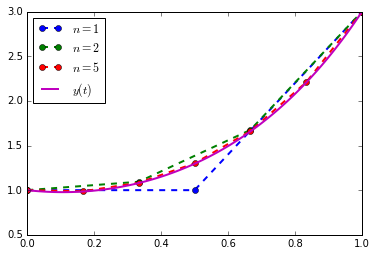

In [152]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Rango de tiempo
t = np.linspace(0, 1, 100)

# Solución Analítica
y = (np.exp(-2*t)*(-3*np.exp(2)+np.exp(4)-np.exp(4*t)+ 3*np.exp(2+4*t)))/(-1+np.exp(4))


# Matriz de diferencias finitas que depende de n
def DiffMatrix(n, h):
    m = np.zeros((n,n))
    np.fill_diagonal(m, -4.0*h**2.0-2)
    dix, diy = np.diag_indices(n)
    dix = dix[:-1]
    diy = diy[:-1] + 1
    m[(dix, diy)] = 1
    dix = dix + 1
    diy = diy - 1
    m[(dix, diy)] = 1
    return m

for n in [1, 2, 5]:
    h = 1.0/(n + 1.0)
    b = np.zeros((n))
    b[0] = -1
    b[-1] = -3
    A = DiffMatrix(n, h)
    w = np.concatenate(([1], np.linalg.solve(A, b), [3]))
    tt = np.linspace(0, 1, n+2)
    plt.plot(tt, w, 'o--',lw=2, label="$n ="+str(n)+"$")
                       
# Plots
plt.plot(t, y, 'm', lw=2, label="$y(t)$")
plt.legend(loc='best')
plt.show()